# Pipelines

Ich code hier all meine Modelle im default und packe sie danach in einen Stacker. Dann vergleiche ich die Ergebnisse. 
Ggf. muss ich danach noch Parametertuning betreiben, wenn ich nur Schrott heraus bekomme. 

**Modelle:**

1. Lineare Regression
2. Elastic Net Regression
3. k-Nearest-Neighbors Regression
4. Random Forest Regression
5. Support Vector Regression
6. Stacker

In [21]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from validation_metric import total_validation
import matplotlib.pyplot as plt
import seaborn as sns


#load data
df = pd.read_csv("C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/processed/berlin_preprocessed.csv")

# split data
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


                 value
MAE              25.81
MAPE (%)         21.67
MSE            1204.20
RMSE (Units)     34.70
r-squared (%)    24.56


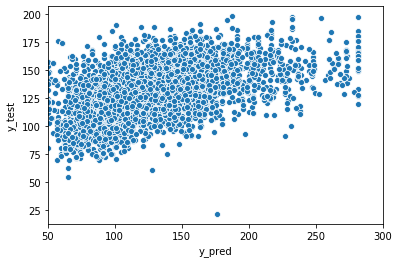

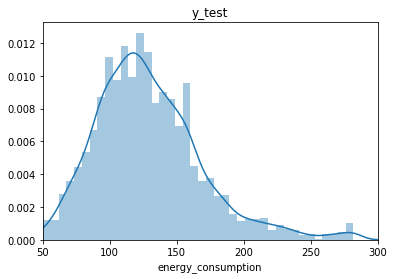

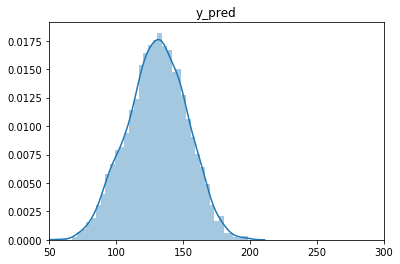

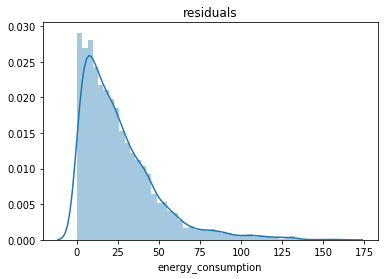

In [53]:
# LinReg:

from sklearn.linear_model import LinearRegression

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('LinReg', LinearRegression())]

pipeline = Pipeline(steps)

LinReg_scaled = pipeline.fit(X_train, y_train)
y_pred = LinReg_scaled.predict(X_test)

metric = total_validation(y_test, y_pred)

print(metric)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test)
_ = plt.title('y_test')
_ = plt.xlim(50, 300)
plt.show()

_ = sns.distplot(y_pred)
_ = plt.title('y_pred')
_ = plt.xlim(50, 300)
plt.show()

residuals = np.abs(y_test - y_pred)
_ = sns.distplot(residuals)
_ = plt.title('residuals')
plt.show()

                 value
MAE              29.35
MAPE (%)         25.20
MSE            1481.79
RMSE (Units)     38.49
r-squared (%)     7.17


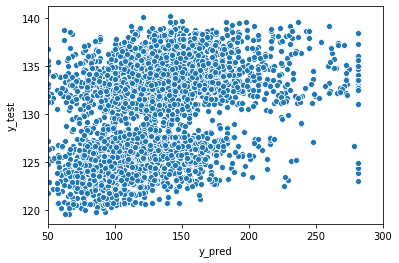

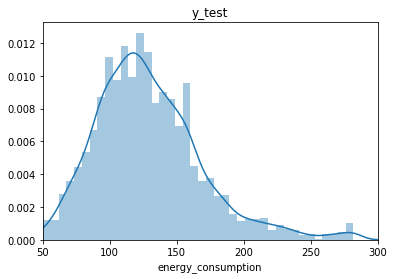

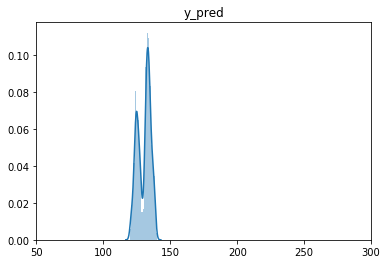

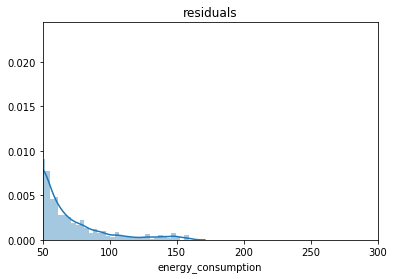

In [54]:
# ElasticNet:

from sklearn.linear_model import ElasticNet

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('ElasticNet', ElasticNet())] #Parameter checken. alpha=0.1, l1_ratio=0.5, tol=0.9

pipeline = Pipeline(steps)

ElasticNet_scaled = pipeline.fit(X_train, y_train)
y_pred = ElasticNet_scaled.predict(X_test)

metric = total_validation(y_test, y_pred)

print(metric)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test)
_ = plt.title('y_test')
_ = plt.xlim(50, 300)
plt.show()

_ = sns.distplot(y_pred)
_ = plt.title('y_pred')
_ = plt.xlim(50, 300)
plt.show()

residuals = np.abs(y_test - y_pred)
_ = sns.distplot(residuals)
_ = plt.title('residuals')
plt.show()

                value
MAE             19.22
MAPE (%)        16.06
MSE            860.55
RMSE (Units)    29.34
r-squared (%)   46.09


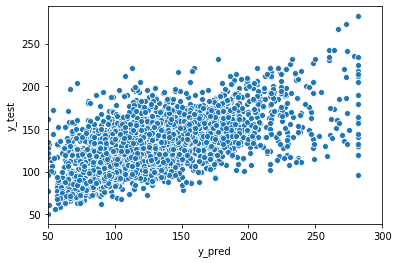

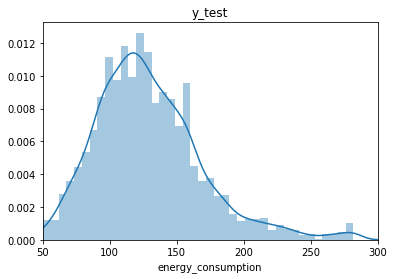

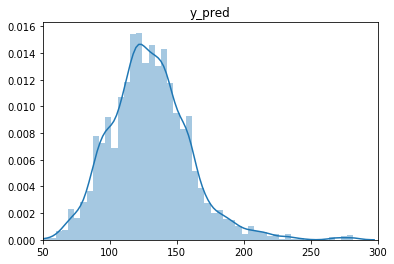

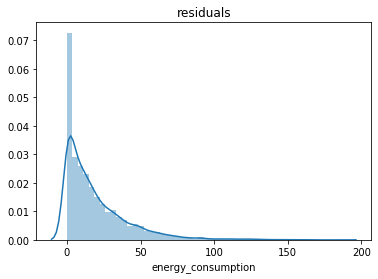

In [55]:
# K NeighborsReg:

from sklearn.neighbors import KNeighborsRegressor

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('KNReg', KNeighborsRegressor())]

pipeline = Pipeline(steps)

KNReg_scaled = pipeline.fit(X_train, y_train)
y_pred = KNReg_scaled.predict(X_test)

metric = total_validation(y_test, y_pred)

print(metric)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test)
_ = plt.title('y_test')
_ = plt.xlim(50, 300)
plt.show()

_ = sns.distplot(y_pred)
_ = plt.title('y_pred')
_ = plt.xlim(50, 300)
plt.show()

residuals = np.abs(y_test - y_pred)
_ = sns.distplot(residuals)
_ = plt.title('residuals')
plt.show()

                value
MAE             15.57
MAPE (%)        13.06
MSE            608.51
RMSE (Units)    24.67
r-squared (%)   61.88


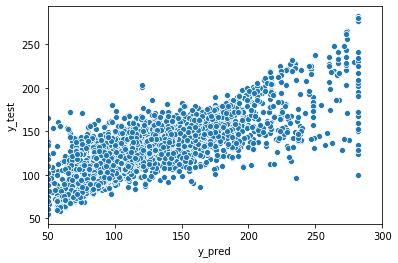

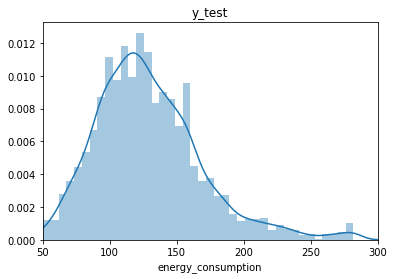

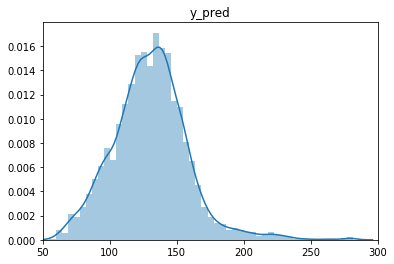

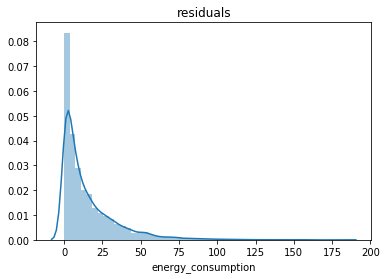

In [56]:
# RandomForestReg:

from sklearn.ensemble import RandomForestRegressor

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('RFReg', RandomForestRegressor(random_state=42))]

pipeline = Pipeline(steps)

RFReg_scaled = pipeline.fit(X_train, y_train)
y_pred = RFReg_scaled.predict(X_test)

metric = total_validation(y_test, y_pred)

print(metric)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test)
_ = plt.title('y_test')
_ = plt.xlim(50, 300)
plt.show()

_ = sns.distplot(y_pred)
_ = plt.title('y_pred')
_ = plt.xlim(50, 300)
plt.show()

residuals = np.abs(y_test - y_pred) #/ y_test
_ = sns.distplot(residuals)
_ = plt.title('residuals')
plt.show()

                 value
MAE              25.60
MAPE (%)         20.85
MSE            1272.32
RMSE (Units)     35.67
r-squared (%)    20.29


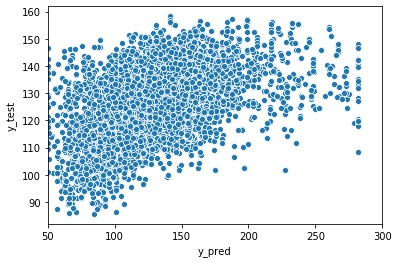

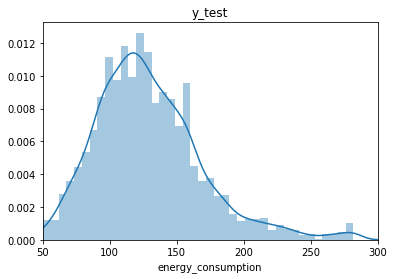

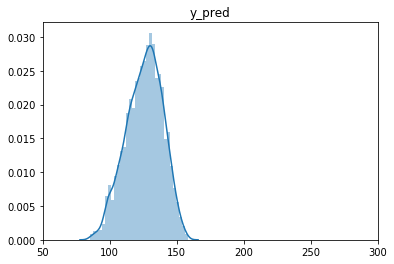

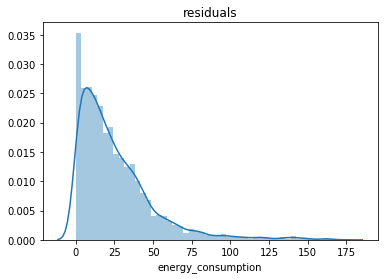

In [57]:
# SVMReg:

from sklearn.svm import SVR

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('SVMReg', SVR())]

pipeline = Pipeline(steps)

SVMReg_scaled = pipeline.fit(X_train, y_train)
y_pred = SVMReg_scaled.predict(X_test)

metric = total_validation(y_test, y_pred)

print(metric)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test)
_ = plt.title('y_test')
_ = plt.xlim(50, 300)
plt.show()

_ = sns.distplot(y_pred)
_ = plt.title('y_pred')
_ = plt.xlim(50, 300)
plt.show()

residuals = np.abs(y_test - y_pred)
_ = sns.distplot(residuals)
_ = plt.title('residuals')
plt.show()

                value
MAE             15.87
MAPE (%)        13.19
MSE            615.90
RMSE (Units)    24.82
r-squared (%)   61.41


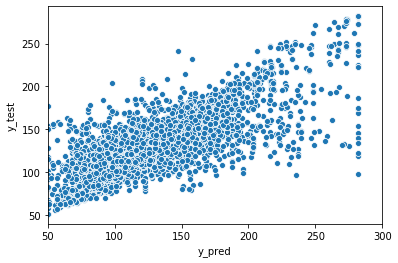

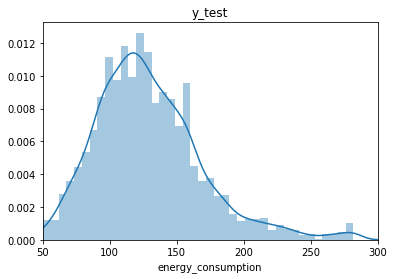

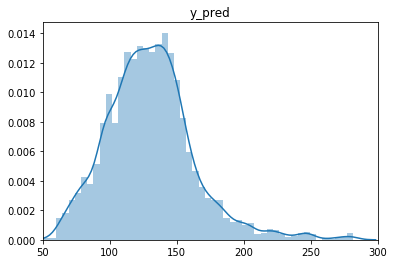

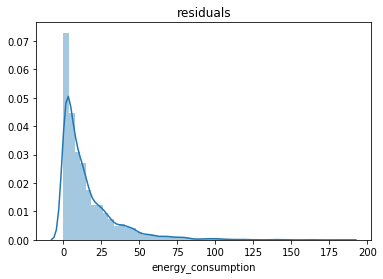

In [58]:
# Stacker:

from sklearn.ensemble import StackingRegressor

estimators = [
    ('LinReg', LinearRegression()),
    ('ElasticNet', ElasticNet()),
    ('KNReg', KNeighborsRegressor()),
    ('RFReg', RandomForestRegressor(random_state=42)),
    ('SVMReg', SVR())
]

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('Stacker', StackingRegressor(
    estimators = estimators,
    final_estimator = RandomForestRegressor(random_state=42)))]

pipeline = Pipeline(steps)

stacker_scaled = pipeline.fit(X_train, y_train)
y_pred = stacker_scaled.predict(X_test)

metric = total_validation(y_test, y_pred)

print(metric)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test)
_ = plt.title('y_test')
_ = plt.xlim(50, 300)
plt.show()

_ = sns.distplot(y_pred)
_ = plt.title('y_pred')
_ = plt.xlim(50, 300)
plt.show()

residuals = np.abs(y_test - y_pred)
_ = sns.distplot(residuals)
_ = plt.title('residuals')
plt.show()